In [1]:
import pandas as pd
import numpy as np
from loguru import logger

# Plot step curves

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


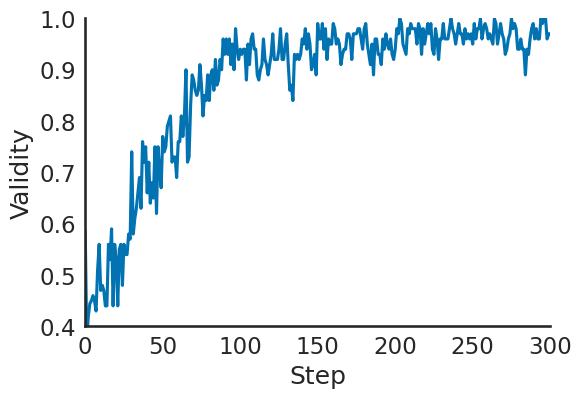

In [2]:
import matplotlib.pyplot as plt
from utils import plot_style_utils

cpp_step_300 = pd.read_csv('result/agent/cpp/pep_perm_5.1_reinvent_cpl_a1_bs100_3000s/all_step_aa_seqs_300_valid.csv')
cpp_step_300_valid = cpp_step_300.groupby('step').agg({'is_valid': np.mean}).reset_index()

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.plot(cpp_step_300_valid['step'], cpp_step_300_valid['is_valid'], label='Validity', color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(0, 300)
ax.set_ylim(0.4, 1)
ax.set_xlabel('Step')
ax.set_ylabel('Validity')
plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/step_validity')

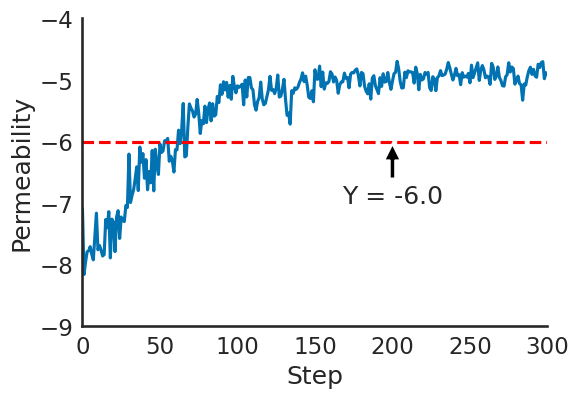

In [3]:
import matplotlib.pyplot as plt
from utils import plot_style_utils

cpp_step_300_perm = cpp_step_300.groupby('step').agg({'raw_permeability': np.mean}).reset_index()

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.plot(cpp_step_300_perm['step'], cpp_step_300_perm['raw_permeability'], label='Permeability', color=plot_style_utils.CAT_PALETTE[0])

# draw horizontal line
ax.axhline(y=-6, color='red', linestyle='--')
ax.annotate('Y = -6.0', xy=(200, -6), xytext=(200, -7), horizontalalignment="center", 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_xlim(0, 300)
ax.set_ylim(-9, -4)
ax.set_xlabel('Step')
ax.set_ylabel('Permeability')
plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/step_perm')